In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

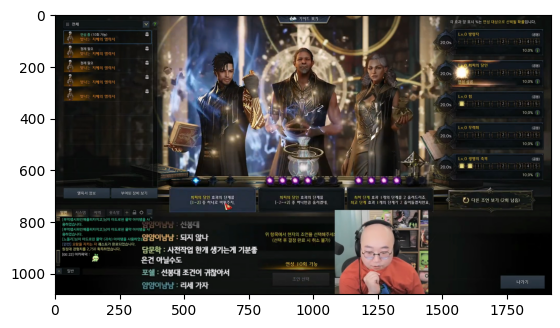

In [2]:
img = Image.open('data/raw/new/[로아] 고스트 엘릭서왕 (삼식,동수칸,엘릭서 연성,로스트아크 게임 풀영상).mp4_031547.775.png')
raw_img_np = np.array(img)
plt.imshow(raw_img_np)

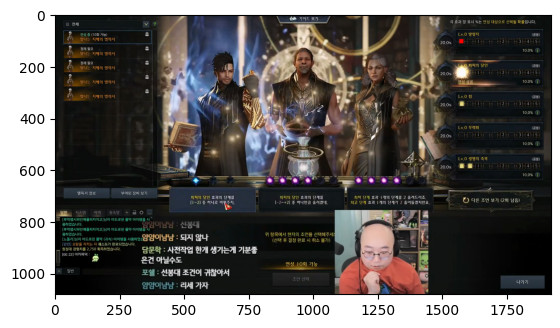

In [3]:
img_np = raw_img_np.copy()
left_top = (105,1570) # (h,w)
right_bottom = (585,1860) # (h,w)
width = right_bottom[1] - left_top[1]
height = right_bottom[0] - left_top[0]
per_slot_width_ratio = 16/width
abs_slot_width = int(per_slot_width_ratio*width)
per_slot_height_ratio = 16/height
abs_slot_height = int(per_slot_height_ratio*height)
img_np[left_top[0]-abs_slot_height//2:left_top[0]+abs_slot_height//2, left_top[1]-abs_slot_width//2:left_top[1]+abs_slot_width//2] = [255,0,0]
plt.imshow(img_np)
plt.show()

In [4]:
print(per_slot_height_ratio, per_slot_width_ratio)

0.03333333333333333 0.05517241379310345


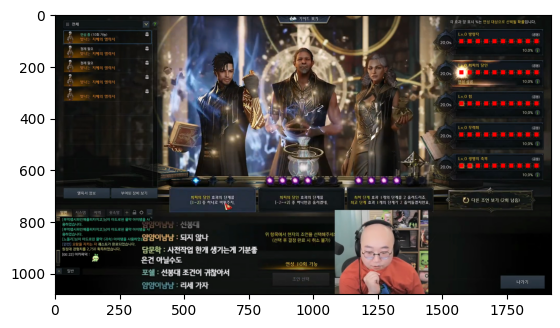

In [5]:
slot_spacing_width = width/9
slot_spacing_height = height/4
for i in range(10):
    for j in range(5):
        img_np[left_top[0]+int(j*slot_spacing_height)-abs_slot_height//2:left_top[0]+int(j*slot_spacing_height)+abs_slot_height//2, left_top[1]+int(i*slot_spacing_width)-abs_slot_width//2:left_top[1]+int(i*slot_spacing_width)+abs_slot_width//2] = [255,0,0]
plt.imshow(img_np)

[[ 17  17  22  18  16  29  17  28  28  27]
 [252 134  23  17  17  28  17  26  30  26]
 [194  18  22  18  17  28  16  28  31  28]
 [ 17  18  22  17  16  26  17  26  30  29]
 [194 196  23  15  18  27  17  27  30  27]]


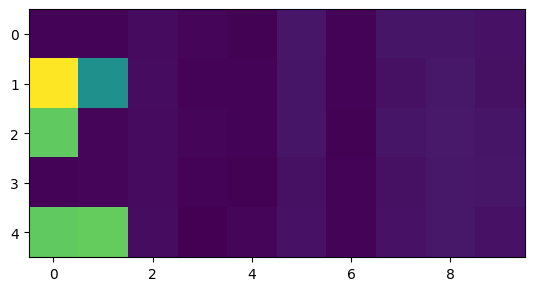

In [6]:
img_np = raw_img_np.copy()
opt_color_average = np.zeros((5,10,3))
for i in range(10):
    for j in range(5):
        opt_color_average[j,i] = np.mean(img_np[left_top[0]+int(j*slot_spacing_height)-abs_slot_height//2:left_top[0]+int(j*slot_spacing_height)+abs_slot_height//2, left_top[1]+int(i*slot_spacing_width)-abs_slot_width//2:left_top[1]+int(i*slot_spacing_width)+abs_slot_width//2], axis=(0,1))
plt.imshow(opt_color_average[:,:,0].astype(np.uint8))
print(opt_color_average[:,:,0].astype(np.uint8))

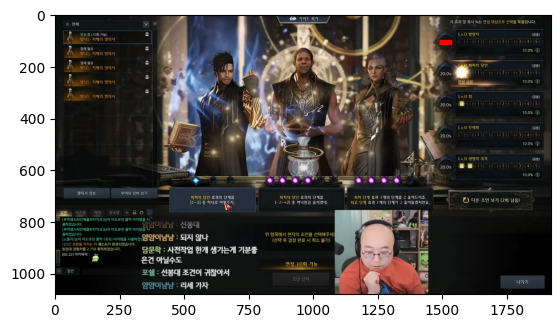

In [7]:
prob_top_center = (110, 1510)
prob_width = 50
prob_width_to_slot_width_ratio = prob_width/width
abs_prob_width = int(prob_width_to_slot_width_ratio*width)
prob_height = 20
prob_height_to_slot_height_ratio = prob_height/height
abs_prob_height = int(prob_height_to_slot_height_ratio*height)


img_np = raw_img_np.copy()
img_np[prob_top_center[0]-abs_prob_height//2:prob_top_center[0]+abs_prob_height//2, prob_top_center[1]-abs_prob_width//2:prob_top_center[1]+abs_prob_width//2] = [255,0,0]
plt.imshow(img_np)
plt.show()

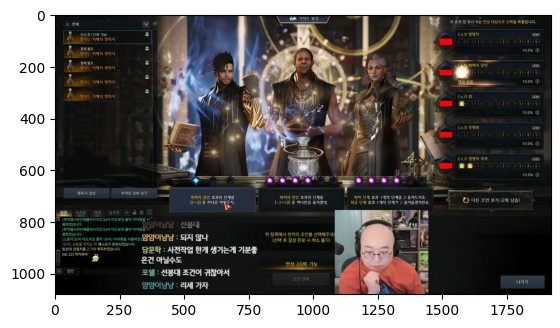

In [8]:
for i in range(5):
    img_np[left_top[0]+int(i*slot_spacing_height)-abs_prob_height//2:left_top[0]+int(i*slot_spacing_height)+abs_prob_height//2, prob_top_center[1]-abs_prob_width//2:prob_top_center[1]+abs_prob_width//2] = [255,0,0]
plt.imshow(img_np)
plt.show()

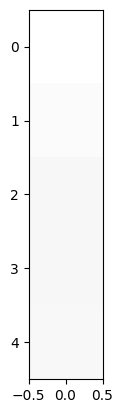

[1.02959529 1.01031873 0.99557162 0.99448901 1.00105157]


In [11]:
img_np = raw_img_np.copy()
prob_color_average = np.zeros((5,3))
for i in range(5):
    prob_color_average[i] = np.mean(img_np[left_top[0]+int(i*slot_spacing_height)-abs_prob_height//2:left_top[0]+int(i*slot_spacing_height)+abs_prob_height//2, prob_top_center[1]-abs_prob_width//2:prob_top_center[1]+abs_prob_width//2], axis=(0,1))
red_blue_ratio = prob_color_average[:,0]/prob_color_average[:,1]
plt.imshow(red_blue_ratio.reshape(5,1), cmap='gray', vmin=0)
plt.show()
print(red_blue_ratio)

In [12]:
adv_1_chaos_0 = (642,487)
adv_1_chaos_6 = (642,732)
adv_2_chaos_0 = (642,830)
adv_1_order_0 = (642,544)
adv_1_order_3 = (642,676)
radius = 5
adv_dist = adv_2_chaos_0[1] - adv_1_chaos_0[1]
chaos_len = adv_1_chaos_6[1] - adv_1_chaos_0[1]
chaos_spacing = chaos_len/5
order_len = adv_1_order_3[1] - adv_1_order_0[1]
order_spacing = order_len/2
adv_dist_to_slot_width_ratio = adv_dist/width
chaos_spacing_to_slot_width_ratio = chaos_spacing/width
order_spacing_to_slot_width_ratio = order_spacing/width
radius_to_slot_width_ratio = radius/width
adv_1_chaos_0_to_slot_top_left_ratio_h = (adv_1_chaos_0[0] - left_top[0])/height
adv_1_chaos_0_to_slot_top_left_ratio_w = (adv_1_chaos_0[1] - left_top[1])/width
adv_1_order_0_to_slot_top_left_ratio_h = (adv_1_order_0[0] - left_top[0])/height
adv_1_order_0_to_slot_top_left_ratio_w = (adv_1_order_0[1] - left_top[1])/width
print(adv_dist_to_slot_width_ratio)
print(chaos_spacing_to_slot_width_ratio)
print(order_spacing_to_slot_width_ratio)
print(radius_to_slot_width_ratio)
print(adv_1_chaos_0_to_slot_top_left_ratio_h)
print(adv_1_chaos_0_to_slot_top_left_ratio_w)
print(adv_1_order_0_to_slot_top_left_ratio_h)
print(adv_1_order_0_to_slot_top_left_ratio_w)

1.1827586206896552
0.16896551724137931
0.22758620689655173
0.017241379310344827
1.11875
-3.7344827586206897
1.11875
-3.537931034482759


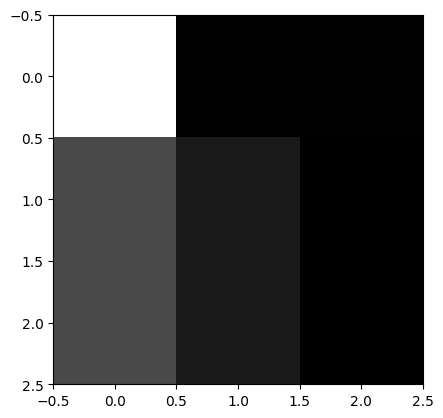

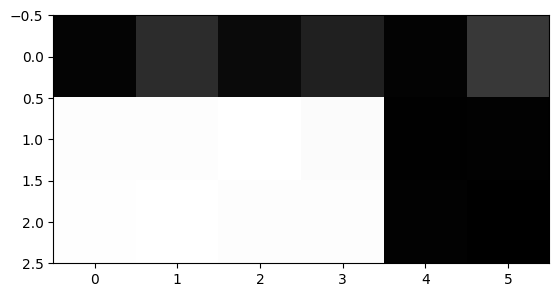

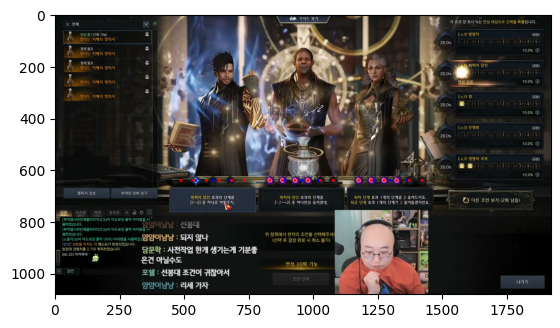

In [13]:
img_np = raw_img_np.copy()
abs_adv_dist = int(adv_dist_to_slot_width_ratio*width)
abs_chaos_spacing = int(chaos_spacing_to_slot_width_ratio*width)
abs_order_spacing = int(order_spacing_to_slot_width_ratio*width)
abs_radius = int(radius_to_slot_width_ratio*width)
abs_adv_1_chaos_0_to_slot_top_left_h = int(adv_1_chaos_0_to_slot_top_left_ratio_h*height)
abs_adv_1_chaos_0_to_slot_top_left_w = int(adv_1_chaos_0_to_slot_top_left_ratio_w*width)
abs_adv_1_order_0_to_slot_top_left_h = int(adv_1_order_0_to_slot_top_left_ratio_h*height)
abs_adv_1_order_0_to_slot_top_left_w = int(adv_1_order_0_to_slot_top_left_ratio_w*width)
order_colors = np.zeros((3,3,3), dtype=np.uint8)
chaos_colors = np.zeros((3,6,3), dtype=np.uint8)
abs_adv_1_chaos_0 = (abs_adv_1_chaos_0_to_slot_top_left_h+left_top[0], abs_adv_1_chaos_0_to_slot_top_left_w+left_top[1])
abs_adv_1_order_0 = (abs_adv_1_order_0_to_slot_top_left_h+left_top[0], abs_adv_1_order_0_to_slot_top_left_w+left_top[1])
for i in range(3):
    # order
    for j in range(3):
        order_colors[i,j] = np.mean(img_np[abs_adv_1_order_0[0]-abs_radius:abs_adv_1_order_0[0]+abs_radius, abs_adv_1_order_0[1]+int(i*abs_adv_dist+j*abs_order_spacing)-abs_radius:abs_adv_1_order_0[1]+int(i*abs_adv_dist+j*abs_order_spacing)+abs_radius], axis=(0,1))
    # chaos
    for j in range(6):
        chaos_colors[i,j] = np.mean(img_np[abs_adv_1_chaos_0[0]-abs_radius:abs_adv_1_chaos_0[0]+abs_radius, abs_adv_1_chaos_0[1]+int(i*abs_adv_dist+j*abs_chaos_spacing)-abs_radius:abs_adv_1_chaos_0[1]+int(i*abs_adv_dist+j*abs_chaos_spacing)+abs_radius], axis=(0,1))
    for j in range(3):
        img_np[abs_adv_1_order_0[0]-abs_radius:abs_adv_1_order_0[0]+abs_radius, abs_adv_1_order_0[1]+int(i*abs_adv_dist+j*abs_order_spacing)-abs_radius:abs_adv_1_order_0[1]+int(i*abs_adv_dist+j*abs_order_spacing)+abs_radius] = [0,0,255]
    for j in range(6):
        img_np[abs_adv_1_chaos_0[0]-abs_radius:abs_adv_1_chaos_0[0]+abs_radius, abs_adv_1_chaos_0[1]+int(i*abs_adv_dist+j*abs_chaos_spacing)-abs_radius:abs_adv_1_chaos_0[1]+int(i*abs_adv_dist+j*abs_chaos_spacing)+abs_radius] = [255,0,0]
plt.imshow(order_colors[...,1], cmap='gray')
plt.show()
plt.imshow(chaos_colors[...,0], cmap='gray')
plt.show()
plt.imshow(img_np)
plt.show()

In [14]:
adv_1_top_left = (674,447)
adv_1_bottom_right = (760,774)
adv_1_top_left_to_slot_top_left_ratio_h = (adv_1_top_left[0] - left_top[0])/height
adv_1_top_left_to_slot_top_left_ratio_w = (adv_1_top_left[1] - left_top[1])/width
adv_1_bottom_right_to_slot_top_left_ratio_h = (adv_1_bottom_right[0] - left_top[0])/height
adv_1_bottom_right_to_slot_top_left_ratio_w = (adv_1_bottom_right[1] - left_top[1])/width
print(adv_1_bottom_right_to_slot_top_left_ratio_h, adv_1_bottom_right_to_slot_top_left_ratio_w)

1.3645833333333333 -2.7448275862068967


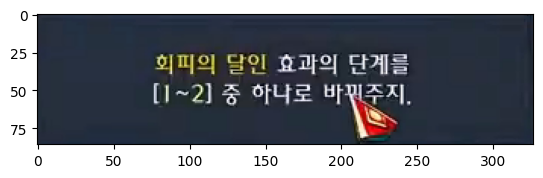

In [15]:
img_np = raw_img_np.copy()
abs_adv_1_top_left = (int(adv_1_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_1_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_1_bottom_right = (int(adv_1_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_1_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_adv_1_top_left[0]:abs_adv_1_bottom_right[0], abs_adv_1_top_left[1]:abs_adv_1_bottom_right[1]])
plt.show()

In [16]:
adv_2_top_left = (674, 790)
adv_2_bottom_right = (760, 1113)
adv_2_top_left_to_slot_top_left_ratio_h = (adv_2_top_left[0] - left_top[0])/height
adv_2_top_left_to_slot_top_left_ratio_w = (adv_2_top_left[1] - left_top[1])/width
adv_2_bottom_right_to_slot_top_left_ratio_h = (adv_2_bottom_right[0] - left_top[0])/height
adv_2_bottom_right_to_slot_top_left_ratio_w = (adv_2_bottom_right[1] - left_top[1])/width
print(adv_2_bottom_right_to_slot_top_left_ratio_h, adv_2_bottom_right_to_slot_top_left_ratio_w)

1.3645833333333333 -1.5758620689655172


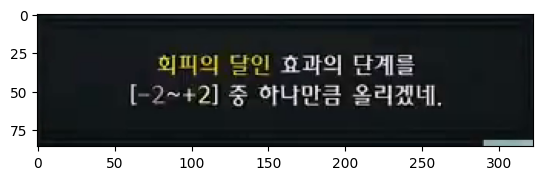

In [18]:
img_np = raw_img_np.copy()
abs_adv_2_top_left = (int(adv_2_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_2_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_2_bottom_right = (int(adv_2_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_2_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_adv_2_top_left[0]:abs_adv_2_bottom_right[0], abs_adv_2_top_left[1]:abs_adv_2_bottom_right[1]])
plt.show()

In [19]:
adv_3_top_left = (674, 1133)
adv_3_bottom_right = (760, 1456)
adv_3_top_left_to_slot_top_left_ratio_h = (adv_3_top_left[0] - left_top[0])/height
adv_3_top_left_to_slot_top_left_ratio_w = (adv_3_top_left[1] - left_top[1])/width
adv_3_bottom_right_to_slot_top_left_ratio_h = (adv_3_bottom_right[0] - left_top[0])/height
adv_3_bottom_right_to_slot_top_left_ratio_w = (adv_3_bottom_right[1] - left_top[1])/width
print(adv_3_bottom_right_to_slot_top_left_ratio_h, adv_3_bottom_right_to_slot_top_left_ratio_w)

1.3645833333333333 -0.3931034482758621


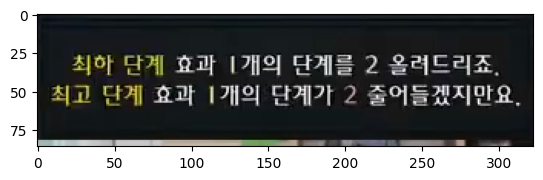

In [20]:
img_np = raw_img_np.copy()
abs_adv_3_top_left = (int(adv_3_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_3_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_3_bottom_right = (int(adv_3_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_3_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_adv_3_top_left[0]:abs_adv_3_bottom_right[0], abs_adv_3_top_left[1]:abs_adv_3_bottom_right[1]])
plt.show()

In [21]:
enchant_n_top_left = (952,920)
enchant_n_bottom_right = (977,985)
enchant_n_top_left_to_slot_top_left_ratio_h = (enchant_n_top_left[0] - left_top[0])/height
enchant_n_top_left_to_slot_top_left_ratio_w = (enchant_n_top_left[1] - left_top[1])/width
enchant_n_bottom_right_to_slot_top_left_ratio_h = (enchant_n_bottom_right[0] - left_top[0])/height
enchant_n_bottom_right_to_slot_top_left_ratio_w = (enchant_n_bottom_right[1] - left_top[1])/width
print(enchant_n_bottom_right_to_slot_top_left_ratio_h, enchant_n_bottom_right_to_slot_top_left_ratio_w)

1.8166666666666667 -2.0172413793103448


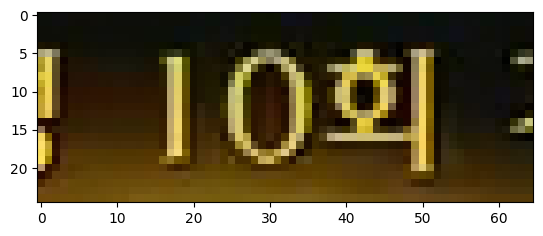

In [23]:
img_np = raw_img_np.copy()
abs_enchant_n_top_left = (int(enchant_n_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(enchant_n_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_enchant_n_bottom_right = (int(enchant_n_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(enchant_n_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_enchant_n_top_left[0]:abs_enchant_n_bottom_right[0], abs_enchant_n_top_left[1]:abs_enchant_n_bottom_right[1]])
plt.show()

In [25]:
import json
ratio_data = {
    "fhd_left_top": [105,1570],
    "fhd_right_bottom": [585,1860],
    "per_slot_height_ratio": per_slot_height_ratio,
    "per_slot_width_ratio": per_slot_width_ratio,
    "prob_width_to_slot_width_ratio": prob_width_to_slot_width_ratio,
    "prob_height_to_slot_height_ratio": prob_height_to_slot_height_ratio,
    "adv_dist_to_slot_width_ratio": adv_dist_to_slot_width_ratio,
    "chaos_spacing_to_slot_width_ratio": chaos_spacing_to_slot_width_ratio,
    "order_spacing_to_slot_width_ratio": order_spacing_to_slot_width_ratio,
    "radius_to_slot_width_ratio": radius_to_slot_width_ratio,
    "adv_1_chaos_0_to_slot_top_left_ratio_h": adv_1_chaos_0_to_slot_top_left_ratio_h,
    "adv_1_chaos_0_to_slot_top_left_ratio_w": adv_1_chaos_0_to_slot_top_left_ratio_w,
    "adv_1_order_0_to_slot_top_left_ratio_h": adv_1_order_0_to_slot_top_left_ratio_h,
    "adv_1_order_0_to_slot_top_left_ratio_w": adv_1_order_0_to_slot_top_left_ratio_w,
    "adv_1_top_left_to_slot_top_left_ratio_h": adv_1_top_left_to_slot_top_left_ratio_h,
    "adv_1_top_left_to_slot_top_left_ratio_w": adv_1_top_left_to_slot_top_left_ratio_w,
    "adv_1_bottom_right_to_slot_top_left_ratio_h": adv_1_bottom_right_to_slot_top_left_ratio_h,
    "adv_1_bottom_right_to_slot_top_left_ratio_w": adv_1_bottom_right_to_slot_top_left_ratio_w,
    "adv_2_top_left_to_slot_top_left_ratio_h": adv_2_top_left_to_slot_top_left_ratio_h,
    "adv_2_top_left_to_slot_top_left_ratio_w": adv_2_top_left_to_slot_top_left_ratio_w,
    "adv_2_bottom_right_to_slot_top_left_ratio_h": adv_2_bottom_right_to_slot_top_left_ratio_h,
    "adv_2_bottom_right_to_slot_top_left_ratio_w": adv_2_bottom_right_to_slot_top_left_ratio_w,
    "adv_3_top_left_to_slot_top_left_ratio_h": adv_3_top_left_to_slot_top_left_ratio_h,
    "adv_3_top_left_to_slot_top_left_ratio_w": adv_3_top_left_to_slot_top_left_ratio_w,
    "adv_3_bottom_right_to_slot_top_left_ratio_h": adv_3_bottom_right_to_slot_top_left_ratio_h,
    "adv_3_bottom_right_to_slot_top_left_ratio_w": adv_3_bottom_right_to_slot_top_left_ratio_w,
    "enchant_n_top_left_to_slot_top_left_ratio_h": enchant_n_top_left_to_slot_top_left_ratio_h,
    "enchant_n_top_left_to_slot_top_left_ratio_w": enchant_n_top_left_to_slot_top_left_ratio_w,
    "enchant_n_bottom_right_to_slot_top_left_ratio_h": enchant_n_bottom_right_to_slot_top_left_ratio_h,
    "enchant_n_bottom_right_to_slot_top_left_ratio_w": enchant_n_bottom_right_to_slot_top_left_ratio_w
}
with open("data/ratio_data.json", "w") as f:
    json.dump(ratio_data, f, indent=4)

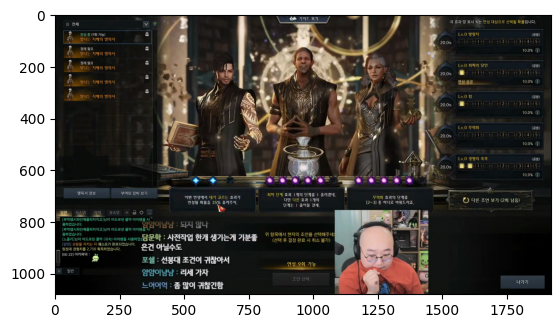

In [68]:
import json
with open("data/ratio_data.json", "r") as f:
    ratio_data = json.load(f)
img = Image.open('data/raw/new/[로아] 고스트 엘릭서왕 (삼식,동수칸,엘릭서 연성,로스트아크 게임 풀영상).mp4_031554.922.png')
raw_img_np = np.array(img)
plt.imshow(raw_img_np)
plt.show()

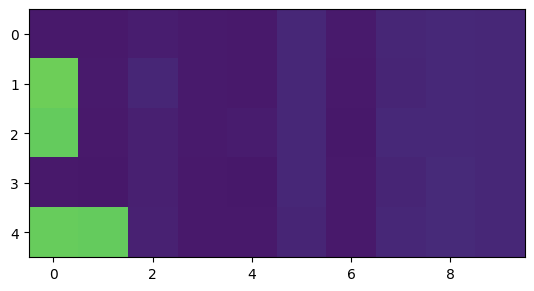

[[ 17  17  20  18  17  28  18  27  29  28]
 [199  18  27  18  17  28  17  26  29  28]
 [195  17  22  18  19  28  16  29  29  28]
 [ 17  16  22  17  16  28  17  26  30  28]
 [196 195  23  17  17  26  17  28  30  28]]


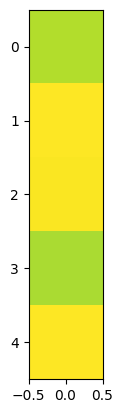

[0.93874356 1.05750395 1.05260435 0.92477185 1.05954421]


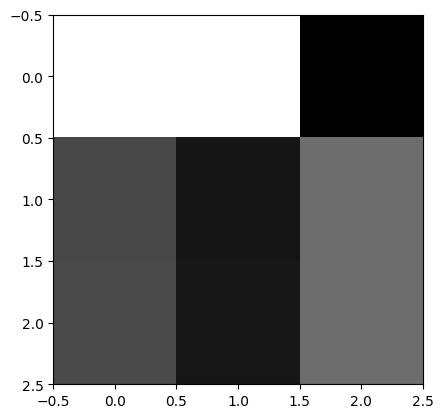

[[238 238  22]
 [ 82  40 114]
 [ 84  42 114]]


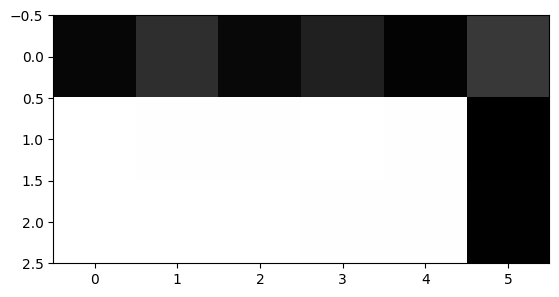

[[ 23  59  25  47  20  69]
 [249 248 248 249 248  17]
 [249 249 249 248 248  18]]


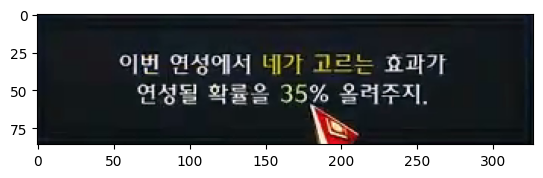

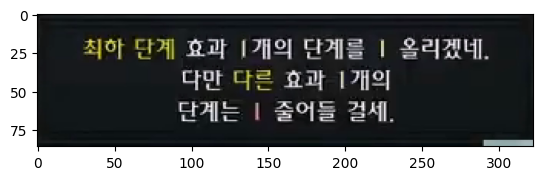

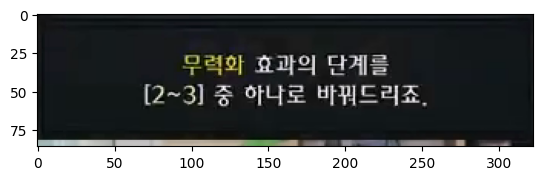

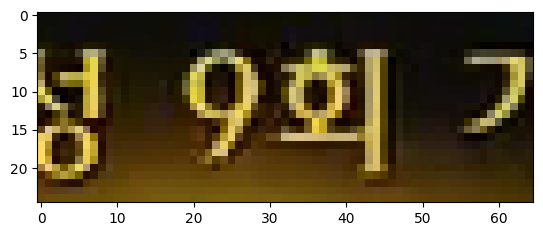

In [69]:
img_np = raw_img_np.copy()
left_top = ratio_data["fhd_left_top"] # (h,w)
right_bottom = ratio_data["fhd_right_bottom"] # (h,w)
height = right_bottom[0] - left_top[0]
width = right_bottom[1] - left_top[1]


per_slot_height_ratio = ratio_data["per_slot_height_ratio"]
per_slot_width_ratio = ratio_data["per_slot_width_ratio"]
prob_width_to_slot_width_ratio = ratio_data["prob_width_to_slot_width_ratio"]
prob_height_to_slot_height_ratio = ratio_data["prob_height_to_slot_height_ratio"]
adv_dist_to_slot_width_ratio = ratio_data["adv_dist_to_slot_width_ratio"]
chaos_spacing_to_slot_width_ratio = ratio_data["chaos_spacing_to_slot_width_ratio"]
order_spacing_to_slot_width_ratio = ratio_data["order_spacing_to_slot_width_ratio"]
radius_to_slot_width_ratio = ratio_data["radius_to_slot_width_ratio"]
adv_1_chaos_0_to_slot_top_left_ratio_h = ratio_data["adv_1_chaos_0_to_slot_top_left_ratio_h"]
adv_1_chaos_0_to_slot_top_left_ratio_w = ratio_data["adv_1_chaos_0_to_slot_top_left_ratio_w"]
adv_1_order_0_to_slot_top_left_ratio_h = ratio_data["adv_1_order_0_to_slot_top_left_ratio_h"]
adv_1_order_0_to_slot_top_left_ratio_w = ratio_data["adv_1_order_0_to_slot_top_left_ratio_w"]
adv_1_top_left_to_slot_top_left_ratio_h = ratio_data["adv_1_top_left_to_slot_top_left_ratio_h"]
adv_1_top_left_to_slot_top_left_ratio_w = ratio_data["adv_1_top_left_to_slot_top_left_ratio_w"]
adv_1_bottom_right_to_slot_top_left_ratio_h = ratio_data["adv_1_bottom_right_to_slot_top_left_ratio_h"]
adv_1_bottom_right_to_slot_top_left_ratio_w = ratio_data["adv_1_bottom_right_to_slot_top_left_ratio_w"]
adv_2_top_left_to_slot_top_left_ratio_h = ratio_data["adv_2_top_left_to_slot_top_left_ratio_h"]
adv_2_top_left_to_slot_top_left_ratio_w = ratio_data["adv_2_top_left_to_slot_top_left_ratio_w"]
adv_2_bottom_right_to_slot_top_left_ratio_h = ratio_data["adv_2_bottom_right_to_slot_top_left_ratio_h"]
adv_2_bottom_right_to_slot_top_left_ratio_w = ratio_data["adv_2_bottom_right_to_slot_top_left_ratio_w"]
adv_3_top_left_to_slot_top_left_ratio_h = ratio_data["adv_3_top_left_to_slot_top_left_ratio_h"]
adv_3_top_left_to_slot_top_left_ratio_w = ratio_data["adv_3_top_left_to_slot_top_left_ratio_w"]
adv_3_bottom_right_to_slot_top_left_ratio_h = ratio_data["adv_3_bottom_right_to_slot_top_left_ratio_h"]
adv_3_bottom_right_to_slot_top_left_ratio_w = ratio_data["adv_3_bottom_right_to_slot_top_left_ratio_w"]
enchant_n_top_left_to_slot_top_left_ratio_h = ratio_data["enchant_n_top_left_to_slot_top_left_ratio_h"]
enchant_n_top_left_to_slot_top_left_ratio_w = ratio_data["enchant_n_top_left_to_slot_top_left_ratio_w"]
enchant_n_bottom_right_to_slot_top_left_ratio_h = ratio_data["enchant_n_bottom_right_to_slot_top_left_ratio_h"]
enchant_n_bottom_right_to_slot_top_left_ratio_w = ratio_data["enchant_n_bottom_right_to_slot_top_left_ratio_w"]

abs_slot_height = int(height * per_slot_height_ratio)
abs_slot_width = int(width * per_slot_width_ratio)
slot_spacing_width = width/9
slot_spacing_height = height/4

opt_color_average = np.zeros((5,10,3))
for i in range(10):
    for j in range(5):
        opt_color_average[j,i] = np.mean(img_np[left_top[0]+int(j*slot_spacing_height)-abs_slot_height//2:left_top[0]+int(j*slot_spacing_height)+abs_slot_height//2, left_top[1]+int(i*slot_spacing_width)-abs_slot_width//2:left_top[1]+int(i*slot_spacing_width)+abs_slot_width//2], axis=(0,1))
plt.imshow(opt_color_average[:,:,0].astype(np.uint8), vmin=0, vmax=255)
plt.show()
print(opt_color_average[:,:,0].astype(np.uint8))

prob_color_average = np.zeros((5,3))
abs_prob_height = int(prob_height_to_slot_height_ratio*height)
abs_prob_width = int(prob_width_to_slot_width_ratio*width)
prob_top_center = (left_top[0], left_top[1])
for i in range(5):
    prob_color_average[i] = np.mean(img_np[
        prob_top_center[0]+int(i*slot_spacing_height)-abs_prob_height//2:prob_top_center[0]+int(i*slot_spacing_height)+abs_prob_height//2, 
        prob_top_center[1]-abs_prob_width//2:prob_top_center[1]+abs_prob_width//2
    ], axis=(0,1))
    img_np[
        prob_top_center[0]+int(i*slot_spacing_height)-abs_prob_height//2:prob_top_center[0]+int(i*slot_spacing_height)+abs_prob_height//2, 
        prob_top_center[1]-abs_prob_width//2:prob_top_center[1]+abs_prob_width//2
        ] = [255,0,0]
red_blue_ratio = prob_color_average[:,0]/prob_color_average[:,1]
plt.imshow(red_blue_ratio.reshape(5,1), vmin=0)
plt.show()
print(red_blue_ratio)

abs_adv_dist = int(adv_dist_to_slot_width_ratio*width)
abs_chaos_spacing = int(chaos_spacing_to_slot_width_ratio*width)
abs_order_spacing = int(order_spacing_to_slot_width_ratio*width)
abs_radius = int(radius_to_slot_width_ratio*width)
abs_adv_1_chaos_0_to_slot_top_left_h = int(adv_1_chaos_0_to_slot_top_left_ratio_h*height)
abs_adv_1_chaos_0_to_slot_top_left_w = int(adv_1_chaos_0_to_slot_top_left_ratio_w*width)
abs_adv_1_order_0_to_slot_top_left_h = int(adv_1_order_0_to_slot_top_left_ratio_h*height)
abs_adv_1_order_0_to_slot_top_left_w = int(adv_1_order_0_to_slot_top_left_ratio_w*width)
order_colors = np.zeros((3,3,3), dtype=np.uint8)
chaos_colors = np.zeros((3,6,3), dtype=np.uint8)
abs_adv_1_chaos_0 = (abs_adv_1_chaos_0_to_slot_top_left_h+left_top[0], abs_adv_1_chaos_0_to_slot_top_left_w+left_top[1])
abs_adv_1_order_0 = (abs_adv_1_order_0_to_slot_top_left_h+left_top[0], abs_adv_1_order_0_to_slot_top_left_w+left_top[1])
for i in range(3):
    # order
    for j in range(3):
        order_colors[i,j] = np.mean(img_np[abs_adv_1_order_0[0]-abs_radius:abs_adv_1_order_0[0]+abs_radius, abs_adv_1_order_0[1]+int(i*abs_adv_dist+j*abs_order_spacing)-abs_radius:abs_adv_1_order_0[1]+int(i*abs_adv_dist+j*abs_order_spacing)+abs_radius], axis=(0,1))
    # chaos
    for j in range(6):
        chaos_colors[i,j] = np.mean(img_np[abs_adv_1_chaos_0[0]-abs_radius:abs_adv_1_chaos_0[0]+abs_radius, abs_adv_1_chaos_0[1]+int(i*abs_adv_dist+j*abs_chaos_spacing)-abs_radius:abs_adv_1_chaos_0[1]+int(i*abs_adv_dist+j*abs_chaos_spacing)+abs_radius], axis=(0,1))
    for j in range(3):
        img_np[abs_adv_1_order_0[0]-abs_radius:abs_adv_1_order_0[0]+abs_radius, abs_adv_1_order_0[1]+int(i*abs_adv_dist+j*abs_order_spacing)-abs_radius:abs_adv_1_order_0[1]+int(i*abs_adv_dist+j*abs_order_spacing)+abs_radius] = [0,0,255]
    for j in range(6):
        img_np[abs_adv_1_chaos_0[0]-abs_radius:abs_adv_1_chaos_0[0]+abs_radius, abs_adv_1_chaos_0[1]+int(i*abs_adv_dist+j*abs_chaos_spacing)-abs_radius:abs_adv_1_chaos_0[1]+int(i*abs_adv_dist+j*abs_chaos_spacing)+abs_radius] = [255,0,0]
plt.imshow(order_colors[...,1], cmap='gray')
plt.show()
print(order_colors[...,1])
plt.imshow(chaos_colors[...,0], cmap='gray')
plt.show()
print(chaos_colors[...,0])

abs_adv_1_top_left = (int(adv_1_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_1_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_1_bottom_right = (int(adv_1_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_1_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
adv_1_img = img_np[abs_adv_1_top_left[0]:abs_adv_1_bottom_right[0], abs_adv_1_top_left[1]:abs_adv_1_bottom_right[1]]
plt.imshow(adv_1_img)
plt.show()
abs_adv_2_top_left = (int(adv_2_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_2_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_2_bottom_right = (int(adv_2_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_2_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
adv_2_img = img_np[abs_adv_2_top_left[0]:abs_adv_2_bottom_right[0], abs_adv_2_top_left[1]:abs_adv_2_bottom_right[1]]
plt.imshow(adv_2_img)
plt.show()
abs_adv_3_top_left = (int(adv_3_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_3_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_3_bottom_right = (int(adv_3_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_3_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
adv_3_img = img_np[abs_adv_3_top_left[0]:abs_adv_3_bottom_right[0], abs_adv_3_top_left[1]:abs_adv_3_bottom_right[1]]
plt.imshow(adv_3_img)
plt.show()

abs_enchant_n_top_left = (int(enchant_n_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(enchant_n_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_enchant_n_bottom_right = (int(enchant_n_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(enchant_n_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
enchant_n_img = img_np[abs_enchant_n_top_left[0]:abs_enchant_n_bottom_right[0], abs_enchant_n_top_left[1]:abs_enchant_n_bottom_right[1]]
plt.imshow(enchant_n_img)
plt.show()

In [70]:
import models
import torch

advice_model_name = 'advice_resnet18_1'
advice_one_model_name = 'advice_one_resnet18_1'
advice_two_model_name = 'advice_two_resnet18_1'
enchant_n_model_name = 'resnet_1'

with open(f'logs/{advice_model_name}/config.json') as f:
    advice_config = json.load(f)
advice_model = getattr(models, advice_config['model_name'])(**advice_config['model_kwargs']).to('cuda')
advice_model.load_state_dict(torch.load(f'logs/{advice_model_name}/checkpoints/best_acc.pt'))
advice_model = advice_model.eval()

with open(f'logs/{advice_one_model_name}/config.json') as f:
    advice_one_config = json.load(f)
advice_one_model = getattr(models, advice_one_config['model_name'])(**advice_one_config['model_kwargs']).to('cuda')
advice_one_model.load_state_dict(torch.load(f'logs/{advice_one_model_name}/checkpoints/best_acc.pt'))
advice_one_model = advice_one_model.eval()

with open(f'logs/{advice_two_model_name}/config.json') as f:
    advice_two_config = json.load(f)
advice_two_model = getattr(models, advice_two_config['model_name'])(**advice_two_config['model_kwargs']).to('cuda')
advice_two_model.load_state_dict(torch.load(f'logs/{advice_two_model_name}/checkpoints/best_acc.pt'))
advice_two_model = advice_two_model.eval()

with open(f'logs/{enchant_n_model_name}/config.json') as f:
    enchant_n_config = json.load(f)
enchant_n_model = getattr(models, enchant_n_config['model_name'])(**enchant_n_config['model_kwargs']).to('cuda')
enchant_n_model.load_state_dict(torch.load(f'logs/{enchant_n_model_name}/checkpoints/epoch_75.pt'))
enchant_n_model = enchant_n_model.eval()

In [71]:
import pandas as pd

messages = pd.read_csv('data/message_clean.csv')
option_names = pd.read_csv('data/options.csv')
with open('data/one_option_adv.json', 'r') as f:
    one_option_adv = json.load(f)
with open('data/two_option_adv.json', 'r') as f:
    two_option_adv = json.load(f)

In [72]:
options = np.zeros((5),dtype=int)
for i, o in enumerate(opt_color_average):
    for opt_color in o:
        if opt_color[0] > 150:
            options[i] += 1
        else:
            break
print(f'Options: {options}')
is_avail = np.ones((5),dtype=bool)
for i, rbr in enumerate(red_blue_ratio):
    if rbr > 1.2:
        is_avail[i] = False
print(f'Is available: {is_avail}')

opt_gauge = np.zeros((3),dtype=int)
for i in range(3):
    for o_c in order_colors[i]:
        if o_c[1] > 170:
            opt_gauge[i] += 1
        else:
            break
    for c_c in chaos_colors[i]:
        if c_c[0] > 170:
            opt_gauge[i] -= 1
        else:
            break
print(f'Option gauge: {opt_gauge}')

Options: [0 1 1 0 2]
Is available: [ True  True  True  True  True]
Option gauge: [ 2 -5 -5]


Advice 1: 이번 연성에서 네가 고르는 효과가 연성될 확률을 35% 올려주지.
Advice 2: 최하 단계 효과 1개의 단계를 1 올려주지.하지만 다른 효과 1개의단계는 1 내려갈 거야.
Advice 3: 무력화 효과의 단계를 [2~3] 중 하나로 바꿔주지.
Enchant: 11


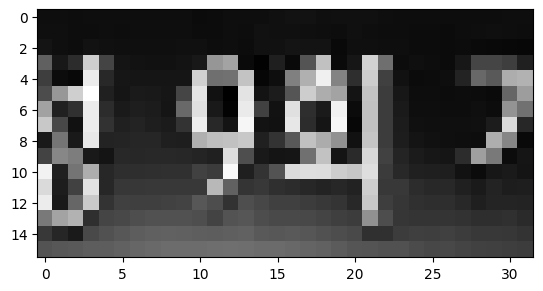

In [73]:
import torchvision.transforms as transforms

advice_transform = transforms.Resize((64,288))
enchant_n_transform = transforms.Compose([
    # transforms.Resize((14,30)),
    transforms.Resize((16,32))
])

adv_1_img_tensor = torch.from_numpy(adv_1_img).permute(2,0,1).unsqueeze(0).float().to('cuda')/255
adv_1_img_tensor = advice_transform(adv_1_img_tensor)
adv_1_pred = advice_model(adv_1_img_tensor)
adv_1_pred = adv_1_pred.argmax(dim=1).item()
adv_1_str = messages.iloc[adv_1_pred].Desc1
if adv_1_pred in one_option_adv:
    one_option = advice_one_model(adv_1_img_tensor)
    one_option = one_option.argmax(dim=1).item()
    adv_1_str = adv_1_str.replace('{0}', option_names.iloc[one_option].option_name)
elif adv_1_pred in two_option_adv:
    two_option = advice_two_model(adv_1_img_tensor)
    two_option_1 = two_option[0,:44].argmax(dim=1).item()
    two_option_2 = two_option[0,44:].argmax(dim=1).item()
    adv_1_str = adv_1_str.replace('{0}', option_names.iloc[two_option_1].option_name)
    adv_1_str = adv_1_str.replace('{1}', option_names.iloc[two_option_2].option_name)

adv_2_img_tensor = torch.from_numpy(adv_2_img).permute(2,0,1).unsqueeze(0).float().to('cuda')/255
adv_2_img_tensor = advice_transform(adv_2_img_tensor)
adv_2_pred = advice_model(adv_2_img_tensor)
adv_2_pred = adv_2_pred.argmax(dim=1).item()
adv_2_str = messages.iloc[adv_2_pred].Desc1
if adv_2_pred in one_option_adv:
    one_option = advice_one_model(adv_2_img_tensor)
    one_option = one_option.argmax(dim=1).item()
    adv_2_str = adv_2_str.replace('{0}', option_names.iloc[one_option].option_name)
elif adv_2_pred in two_option_adv:
    two_option = advice_two_model(adv_2_img_tensor)
    two_option_1 = two_option[0,:44].argmax(dim=1).item()
    two_option_2 = two_option[0,44:].argmax(dim=1).item()
    adv_2_str = adv_2_str.replace('{0}', option_names.iloc[two_option_1].option_name)
    adv_2_str = adv_2_str.replace('{1}', option_names.iloc[two_option_2].option_name)

adv_3_img_tensor = torch.from_numpy(adv_3_img).permute(2,0,1).unsqueeze(0).float().to('cuda')/255
adv_3_img_tensor = advice_transform(adv_3_img_tensor)
adv_3_pred = advice_model(adv_3_img_tensor)
adv_3_pred = adv_3_pred.argmax(dim=1).item()
adv_3_str = messages.iloc[adv_3_pred].Desc1
if adv_3_pred in one_option_adv:
    one_option = advice_one_model(adv_3_img_tensor)
    one_option = one_option.argmax(dim=1).item()
    adv_3_str = adv_3_str.replace('{0}', option_names.iloc[one_option].option_name)
elif adv_3_pred in two_option_adv:
    two_option = advice_two_model(adv_3_img_tensor)
    two_option_1 = two_option[0,:44].argmax(dim=1).item()
    two_option_2 = two_option[0,44:].argmax(dim=1).item()
    adv_3_str = adv_3_str.replace('{0}', option_names.iloc[two_option_1].option_name)
    adv_3_str = adv_3_str.replace('{1}', option_names.iloc[two_option_2].option_name)

enchant_n_img_tensor = torch.from_numpy(enchant_n_img[...,1:2]).permute(2,0,1).unsqueeze(0).float().to('cuda')/255
enchant_n_img_tensor = enchant_n_transform(enchant_n_img_tensor)
enchant_n_pred = enchant_n_model(enchant_n_img_tensor)
enchant_n_pred = enchant_n_pred.argmax(dim=1).item()

print(f'Advice 1: {adv_1_str}')
print(f'Advice 2: {adv_2_str}')
print(f'Advice 3: {adv_3_str}')
print(f'Enchant: {enchant_n_pred}')
plt.imshow(enchant_n_img_tensor.cpu()[0,0],cmap='gray')